**<h1> Chess Pieces Identification and attempt at FEN**

In this project, we will be using opencv to identify chess pieces and will make an attempt to generate the FEN notation for the same.


**<h3>FEN:**

Forsyth–Edwards Notation is a standard notation for describing a particular board position of a chess game. The purpose of FEN is to provide all the necessary information to restart a game from a particular position. FEN is based on a system developed by Scottish newspaper journalist David Forsyth.





**<h2> Importing the Libraries**


**1) Numpy:**Using this library , one can easily work with arrays and multidimensional matrices and also apply various other mathematical operations with them.

**2) Matplotlib:**It is the plotting library for python programming language.

**3) Opencv (cv2):**OpenCV is a library of programming functions mainly aimed at real-time computer vision.


In [0]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

**Upload Features**

The below function is called whenever we need to upload any particular image. It returns the name of the uploaded file in a usable format.

In [0]:
def uploadfeatures():
   from google.colab import files
   uploaded = files.upload()
   return str(list(uploaded.keys())[0])

**Upload Pieces**

The below function is used to upload the chess pieces which will be used as a source for identification of the chess pieces on the chess board. It returns a list of the names of the images uploaded.

In [0]:
def upload_pieces():
  a=[]
  for i in range(5):
    a.append(uploadfeatures())
  return a


**Board Splitting**

The below function takes the board as input and divides it into 8 rows.It saves each row in the list the_rows such that they all are accessible.


In [0]:
def board_splitting():
  print("Upload Board")
  img=cv.imread(uploadfeatures(),0)
  the_rows=[]
  for i in range(0,img.shape[0],50):
        show(img[i:i+50])
        the_rows.append(img[i:i+50,0:img.shape[0]])
        print("             ")
  return the_rows

**FEN GENERATOR**

This function will be accepting the name of the piece detected in the image and will be returning the fen notation for it.
The Fen Notations are as follows:


*   **King:** K
*   **Queen:** Q
*   **Knight:** N
*   **Pawn:** P
*   **Bishop:**B
*   **Rookie:**R

The above fen notations are for white pieces.For the black pieces the characters are the same but are just in lowercase.



In [0]:
def fen_generator(the_piece):
     key=the_piece[:-6]
     x={'whitebishop':'B','blackbishop':'b','whitelephant':'R','blackelephant':'r','whiteking':'K','blacking':'k','whitequeen':'Q','blackqueen':'q','whiteknight':'N',
        'blacknight':'n','whitepawn':'P','blackpawn':'p'}
     if(key in x):
       return x[key]
     else:
       #spaces
       return 0

Next, we will be uploading the images of all the pieces.

In [26]:
the_pieces=upload_pieces()



Saving whiteking1.jpeg to whiteking1 (1).jpeg


Saving space.jpeg to space.jpeg


Saving whitepawn1.jpeg to whitepawn1 (1).jpeg


Saving blackqueen1.jpeg to blackqueen1 (2).jpeg


Saving blackelephant1.jpeg to blackelephant1.jpeg


In [47]:
the_pieces

['whiteking1.jpeg',
 'space.jpeg',
 'whitepawn1.jpeg',
 'blackqueen1.jpeg',
 'blackelephant1.jpeg']

The above is a list of the uploaded images.

Next,we will be uploading the board and splitting it into 8 rows.

Upload Board


Saving 1b1b1b2-3r4-1rK4b-R7-R2R1k2-2Bp4-2P5-2r5.jpeg to 1b1b1b2-3r4-1rK4b-R7-R2R1k2-2Bp4-2P5-2r5 (10).jpeg


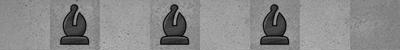

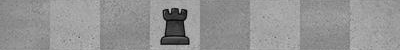

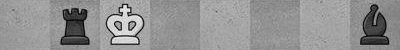

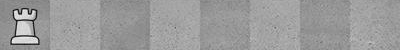

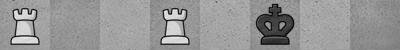

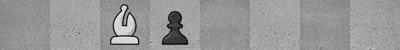

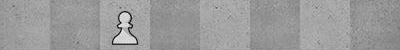

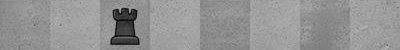

In [85]:
z=board_splitting()


The above images show the images making the board. We have broken them into 8 images, each image containing a row in order to take out FEN of each row and then in the final stage , we will club it to given the fen notation of the whole board.

In [29]:
print(len(z))

8


In Google Colab, cv.imshow is not allowed to be used. In order to use it , the below line needs to be written.

In [0]:
from google.colab.patches import cv2_imshow as show


**<h3>Template Matching in OpenCV:**

Template matching is a technique for finding areas of an image that are similar to a patch (template).
A patch is a small image with certain features. The goal of template matching is to find the patch/template in an image.
To find it, the user has to give two input images: Source Image (S) – The image to find the template in and Template Image (T) – The image that is to be found in the source image.

* It is basically a method for searching and finding the location of a template image in a larger image.
* The idea here is to find identical regions of an image that match a template we provide, giving a threshold
* The threshold depends on the accuracy with which we want to detect the template in the source image.

  For instance, if we are applying face recognition and we want to detect the eyes of a person, we can provide a random image of an eye as the template and search the source (the face of a person).
In this case, since “eyes” show a large amount of variations from person to person, even if we set the threshold as 50%(0.5), the eye will be detected.
In cases where almost identical templates are to be searched, the threshold should be set high.(t>=0.8)


whiteking1.jpeg


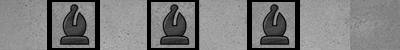

False
0
1
space.jpeg


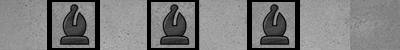

False
0
2
whitepawn1.jpeg


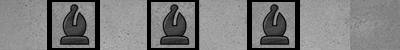

False
0
3
blackqueen1.jpeg


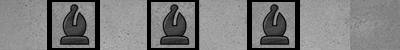

False
0
4
blackelephant1.jpeg


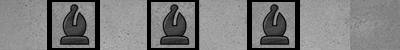

False
0
5
whiteking1.jpeg


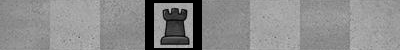

False
0
1
space.jpeg


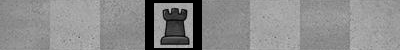

False
0
2
whitepawn1.jpeg


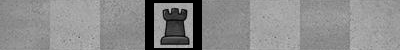

False
0
3
blackqueen1.jpeg


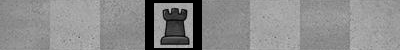

False
0
4
blackelephant1.jpeg


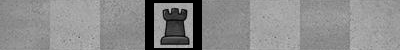

False
0
5
whiteking1.jpeg


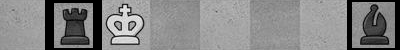

False
0
1
space.jpeg


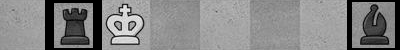

False
0
2
whitepawn1.jpeg


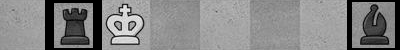

False
0
3
blackqueen1.jpeg


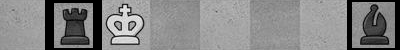

False
0
4
blackelephant1.jpeg


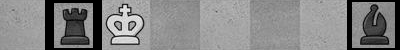

False
0
5
whiteking1.jpeg


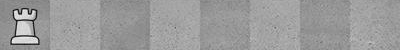

False
0
1
space.jpeg


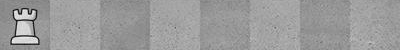

False
0
2
whitepawn1.jpeg


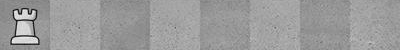

False
0
3
blackqueen1.jpeg


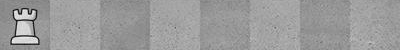

False
0
4
blackelephant1.jpeg


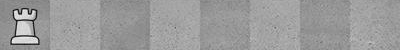

False
0
5
whiteking1.jpeg


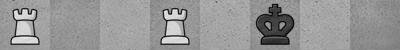

False
0
1
space.jpeg


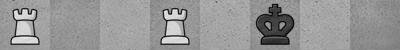

False
0
2
whitepawn1.jpeg


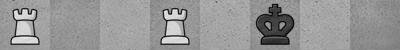

False
0
3
blackqueen1.jpeg


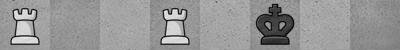

False
0
4
blackelephant1.jpeg


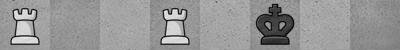

False
0
5
whiteking1.jpeg


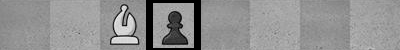

False
0
1
space.jpeg


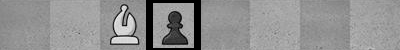

False
0
2
whitepawn1.jpeg


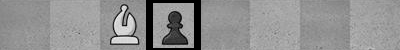

False
0
3
blackqueen1.jpeg


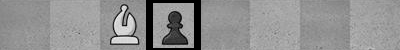

False
0
4
blackelephant1.jpeg


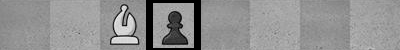

False
0
5
whiteking1.jpeg


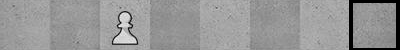

False
0
1
space.jpeg


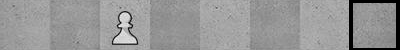

False
0
2
whitepawn1.jpeg


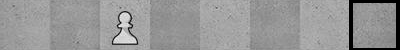

False
0
3
blackqueen1.jpeg


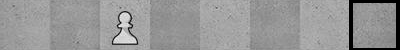

False
0
4
blackelephant1.jpeg


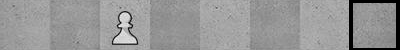

False
0
5
whiteking1.jpeg


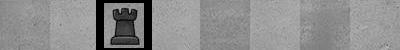

False
0
1
space.jpeg


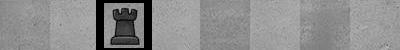

False
0
2
whitepawn1.jpeg


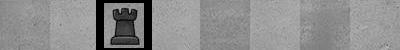

False
0
3
blackqueen1.jpeg


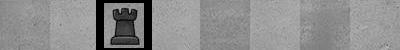

False
0
4
blackelephant1.jpeg


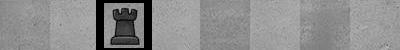

False
0
5


In [77]:
fen=[]
x=0
for i in range(len(z)):#call board_splitting
  for j in range(len(the_pieces)):
      print(the_pieces[j])
      template = cv.imread(the_pieces[j],0) #this needs to be in loop for detection
      w, h = template.shape[::-1]
      res = cv.matchTemplate(z[i],template,cv.TM_CCOEFF_NORMED)
      threshold = 0.6
      loc = np.where( res >= threshold)
      detection=False
      for pt in zip(*loc[::-1]):
         if pt is not None:
          detection= True
          cv.rectangle(z[i], pt, (pt[0] + w, pt[1] + h),(0,255,0) , 2)
      
      cv.imwrite('Users\Tarushi Pathak\Desktop\res.jpeg',z[i])
      show(z[i])
      print(detection)
      print(y)
      if(detection is True):
        x=0
        print(the_pieces[j],'detected')
        fen.append(fen_generator(the_pieces[j]))
      elif(detection is False or the_pieces[j]=='space'):
        x=x+1
        fen.append(str(x))
        print(x)
  fen.append('/')
  x=0


In [83]:
x=list(fen)
z=str(x)
z.split('/')

["['1', '2', '3', '4', '5', '",
 "', '1', '2', '3', '4', '5', '",
 "', '1', '2', '3', '4', '5', '",
 "', '1', '2', '3', '4', '5', '",
 "', '1', '2', '3', '4', '5', '",
 "', '1', '2', '3', '4', '5', '",
 "', '1', '2', '3', '4', '5', '",
 "', '1', '2', '3', '4', '5', '",
 "']"]

**<h2> Conclusion**

In the above project, we used an accuracy of 60% as detections were better with this accuracy. FEN was also succesfully generated.
Templates proved to be a good source for identifying images and helped us save the time spent in training the images using CNN , RCNN or YOLO algorithms.
However, in order to gain better results use of the above algorithms/models is highly recommended.
